In [1]:
!pip install imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold

In [2]:
# load data
data = pd.read_csv("Daily Flood data.csv",usecols=['elevation','OneDayPriorRainfallOrigin',
                            'TenDayPriorOrigin', 'OneDayPriorRainfall', 'threedaysprior',
                            'sevendaysprior', 'tendaysprior', 'Flood'])
print(data.shape)
print(data.head())
print(data.describe())

(46046, 8)
   elevation  OneDayPriorRainfallOrigin  TenDayPriorOrigin  \
0        0.0                        0.3               92.3   
1        0.0                        8.3               95.4   
2        0.0                       17.0               96.9   
3        0.0                        4.0               97.8   
4        0.0                        5.3              115.7   

   OneDayPriorRainfall  threedaysprior  sevendaysprior  tendaysprior  Flood  
0                  0.0             0.0            37.0          80.0      0  
1                  0.0             0.0            52.0          80.0      0  
2                  0.0            12.0            72.0          92.0      0  
3                  0.0             0.0            80.0         100.0      0  
4                 12.0            37.0            80.0         115.0      0  
          elevation  OneDayPriorRainfallOrigin  TenDayPriorOrigin  \
count  46046.000000               45895.000000       46046.000000   
mean      

In [3]:
#missing values
null_values = data.isnull().sum()
print(null_values)

#missingvaluesImputation
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=['elevation','OneDayPriorRainfallOrigin',
                            'TenDayPriorOrigin', 'OneDayPriorRainfall', 'threedaysprior',
                            'sevendaysprior', 'tendaysprior', 'Flood'])
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=['elevation','OneDayPriorRainfallOrigin',
                            'TenDayPriorOrigin', 'OneDayPriorRainfall', 'threedaysprior',
                            'sevendaysprior', 'tendaysprior', 'Flood'])
print(data.select_dtypes(include='number').nunique())
print(data.isnull().sum())
print(data.describe())

elevation                      0
OneDayPriorRainfallOrigin    151
TenDayPriorOrigin              0
OneDayPriorRainfall          571
threedaysprior                 0
sevendaysprior                 0
tendaysprior                   0
Flood                          0
dtype: int64
elevation                       5
OneDayPriorRainfallOrigin     887
TenDayPriorOrigin            2150
OneDayPriorRainfall          9359
threedaysprior               2502
sevendaysprior               3030
tendaysprior                 3778
Flood                           2
dtype: int64
elevation                    0
OneDayPriorRainfallOrigin    0
TenDayPriorOrigin            0
OneDayPriorRainfall          0
threedaysprior               0
sevendaysprior               0
tendaysprior                 0
Flood                        0
dtype: int64
          elevation  OneDayPriorRainfallOrigin  TenDayPriorOrigin  \
count  46046.000000               46046.000000       46046.000000   
mean       0.393716                   0

(45070, 10)


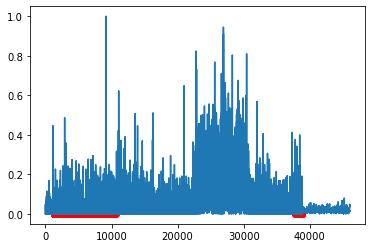

In [4]:
#movingaveragebasedoutlierremoval
# set window size
window_size = 7

# calculate moving average
data['moving_average'] = data['OneDayPriorRainfall'].rolling(window_size).mean()

# calculate z-score for each data point
data['z_score'] = (data['OneDayPriorRainfall'] - data['moving_average']) / data['OneDayPriorRainfall'].rolling(window_size).std()

# identify outliers
threshold = 3
outliers = data[data['z_score'].abs() > threshold]

data = data.drop(outliers.index)
print(data.shape)
# plot data and outliers
plt.plot(data['OneDayPriorRainfall'])
plt.scatter(outliers.index, outliers['OneDayPriorRainfall'], color='r')
plt.show()

(44437, 10)


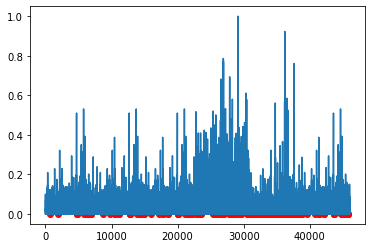

In [5]:
# calculate moving average
data['moving_average'] = data['OneDayPriorRainfallOrigin'].rolling(window_size).mean()

# calculate z-score for each data point
data['z_score'] = (data['OneDayPriorRainfallOrigin'] - data['moving_average']) / data['OneDayPriorRainfallOrigin'].rolling(window_size).std()

# identify outliers
threshold = 3
outliers = data[data['z_score'].abs() > threshold]

data = data.drop(outliers.index)
print(data.shape)
# plot data and outliers
plt.plot(data['OneDayPriorRainfallOrigin'])
plt.scatter(outliers.index, outliers['OneDayPriorRainfallOrigin'], color='r')
plt.show()

In [6]:
#imbalanceclasshanding
from imblearn.over_sampling import SMOTE
print(data.columns)
data = data.drop(['moving_average', 'z_score'], axis=1)
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(data.drop('Flood', axis=1), data['Flood'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(oversampled_X, oversampled_Y, test_size=0.3, random_state=32)
print(oversampled_X.shape)

Index(['elevation', 'OneDayPriorRainfallOrigin', 'TenDayPriorOrigin',
       'OneDayPriorRainfall', 'threedaysprior', 'sevendaysprior',
       'tendaysprior', 'Flood', 'moving_average', 'z_score'],
      dtype='object')
(88660, 7)


[0.12488866 0.15517416 0.15823124 0.15958464 0.12829134 0.12433979
 0.14949016]


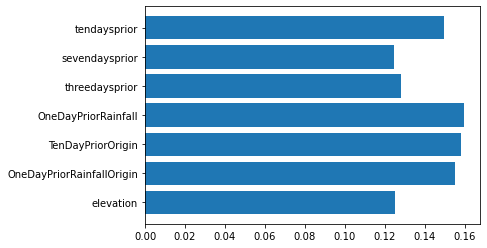

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

X_list=['elevation','OneDayPriorRainfallOrigin',
                            'TenDayPriorOrigin', 'OneDayPriorRainfall', 'threedaysprior',
                            'sevendaysprior', 'tendaysprior']
X_train_full, X_test, y_train_full, y_test = train_test_split(oversampled_X, oversampled_Y, test_size=0.3,
                                                              random_state=1)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_full, y_train_full)
print(rf.feature_importances_)
plt.barh(X_list, rf.feature_importances_)
plt.show()

In [8]:
!pip install mlxtend

In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector

scv = StratifiedKFold(n_splits=5)
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                             k_features=6,
                                             forward=False,
                                             verbose=2,
                                             scoring='roc_auc',
                                             cv=scv)
features = feature_selector.fit(np.array(X_train.fillna(0)), y_train)

filtered_features = X_train.columns[list(features.k_feature_idx_)]
print(filtered_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.7s remaining:    0.0s


Index(['elevation', 'OneDayPriorRainfallOrigin', 'TenDayPriorOrigin',
       'OneDayPriorRainfall', 'threedaysprior', 'tendaysprior'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.7min finished

[2023-03-13 13:07:13] Features: 6/6 -- score: 0.9995145325364778

2 [0.9706744868035191]
4 [0.9706744868035191, 0.9818031430934657]
6 [0.9706744868035191, 0.9818031430934657, 0.9833822091886608]
8 [0.9706744868035191, 0.9818031430934657, 0.9833822091886608, 0.9838709677419355]
10 [0.9706744868035191, 0.9818031430934657, 0.9833822091886608, 0.9838709677419355, 0.9846229039777427]
12 [0.9706744868035191, 0.9818031430934657, 0.9833822091886608, 0.9838709677419355, 0.9846229039777427, 0.9845101135423716]
14 [0.9706744868035191, 0.9818031430934657, 0.9833822091886608, 0.9838709677419355, 0.9846229039777427, 0.9845101135423716, 0.9851868561545981]
16 [0.9706744868035191, 0.9818031430934657, 0.9833822091886608, 0.9838709677419355, 0.9846229039777427, 0.9845101135423716, 0.9851868561545981, 0.9853748402135499]


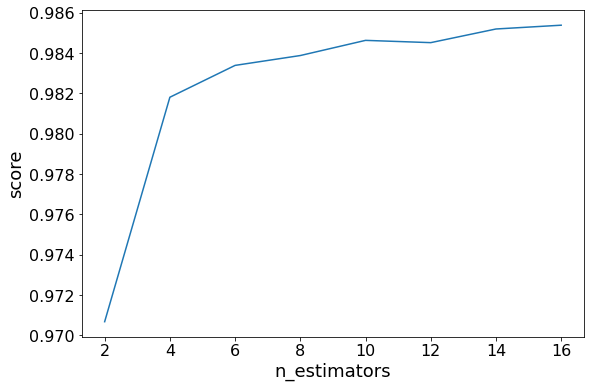

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

estimator_range = [2, 4, 6, 8, 10, 12, 14, 16]
models = []
scores = []

data= oversampled.drop(['sevendaysprior'], axis=1)
x=data.drop('Flood', axis=1)
y=data['Flood']
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, test_size=0.3,
                                                              random_state=1)
for n_estimators in estimator_range:
    # Create bagging classifier
    clf = BaggingClassifier(n_estimators=n_estimators, random_state=22)

    # Fit the model
    clf.fit(X_train_full, y_train_full)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
    print(n_estimators, scores)
    
import matplotlib.pyplot as plt


# # Generate the plot of scores against number of estimators
plt.figure(figsize=(9, 6))
plt.plot(estimator_range, scores)
#
# # Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize=18)
plt.ylabel("score", fontsize=18)
plt.tick_params(labelsize=16)

# Visualize plot
plt.show()


In [11]:
from sklearn.metrics import accuracy_score, classification_report

data= oversampled.drop(['sevendaysprior'], axis=1)
x=data.drop('Flood', axis=1)
y=data['Flood']
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, test_size=0.3,
                                                              random_state=1)
clf = BaggingClassifier(n_estimators=16, random_state=22)
clf.fit(X_train_full, y_train_full)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     13339
         1.0       0.98      1.00      0.99     13259

    accuracy                           0.99     26598
   macro avg       0.99      0.99      0.99     26598
weighted avg       0.99      0.99      0.99     26598



In [12]:
import joblib

# Assume that you have a trained model called `model`

# Save the model to a file named `model.pkl`
joblib.dump(clf, 'clf.pkl')


['clf.pkl']

In [13]:
# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier(n_neighbors=5)))
    models.append(('cart', DecisionTreeClassifier(criterion="entropy", max_depth=None,
                                                  random_state=42)))
    models.append(('svm', SVC(kernel='linear', C=1)))
    models.append(('bayes', GaussianNB()))
    return models
    

In [14]:
# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
    # fit all models on the training set and predict on hold out set
    meta_X = list()
    for name, model in models:
        # fit in training set
        model.fit(X_train, y_train)
        # predict on hold out set
        yhat = model.predict(X_val)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X =np.hstack(meta_X)
    # define blending model
    blender = LogisticRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_val)
    return blender

In [15]:
# # make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
    # make predictions with base models
    meta_X = list()
    for name, model in models:
        # predict with base model
        yhat = model.predict(X_test)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = np.hstack(meta_X)
    # predict
    return blender.predict(meta_X)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# # split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# # create the base models
models = get_models()
# # train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# # make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# # evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score * 100))
print(classification_report(y_test, yhat))

Train: (41581, 6), Val: (20481, 6), Test: (26598, 6)
Blending Accuracy: 97.992
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     13339
         1.0       0.98      0.98      0.98     13259

    accuracy                           0.98     26598
   macro avg       0.98      0.98      0.98     26598
weighted avg       0.98      0.98      0.98     26598



In [17]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split

kfold = model_selection.KFold(n_splits=10, random_state=43, shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=None,
                                random_state=42)
estimators.append(('cart', model2))
model3 = SVC(kernel='linear', C=1)
estimators.append(('svm', model3))
model4 = GaussianNB()
estimators.append(('bayes', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_full, y_train_full)
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.76      0.67     13339
         1.0       0.68      0.51      0.58     13259

    accuracy                           0.63     26598
   macro avg       0.64      0.63      0.63     26598
weighted avg       0.64      0.63      0.63     26598



In [18]:
stackingClassifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
resultstacking = stackingClassifier.fit(X_train_full, y_train_full).score(X_test, y_test)
print(resultstacking)
y_predict = stackingClassifier.predict(X_test)
print(classification_report(y_test, y_predict))

0.9778554778554779
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     13339
         1.0       0.97      0.99      0.98     13259

    accuracy                           0.98     26598
   macro avg       0.98      0.98      0.98     26598
weighted avg       0.98      0.98      0.98     26598



In [21]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(n_estimators=16, random_state=22)
clf.fit(X_train_full, y_train_full)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     13339
         1.0       0.98      1.00      0.99     13259

    accuracy                           0.99     26598
   macro avg       0.99      0.99      0.99     26598
weighted avg       0.99      0.99      0.99     26598



In [20]:
# Import models and utility functions

from sklearn.model_selection import train_test_split

# Setting SEED for reproducibility
SEED = 1
# Splitting dataset
data= oversampled.drop(['sevendaysprior'], axis=1)
x=data.drop('Flood', axis=1)
y=data['Flood']
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=SEED)

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingClassifier(n_estimators=200, max_depth=1, random_state=SEED)

# Fit to training set
gbr.fit(train_X, train_y)

# Predict on test set
pred_y = gbr.predict(test_X)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.70      0.67      0.69     13339
         1.0       0.68      0.71      0.70     13259

    accuracy                           0.69     26598
   macro avg       0.69      0.69      0.69     26598
weighted avg       0.69      0.69      0.69     26598

